In [43]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_html("https://fbref.com/pt/comps/9/2023-2024/cronograma/2023-2024-Premier-League-Resultados-e-Calendarios")[0]
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', 10)
print(df)

      Sem  Dia        Data Horário         Em casa   xG Resultado  xG.1  \
0     1.0  sex  2023-08-11   20:00         Burnley  0.3       0–3   1.9   
1     1.0  sáb  2023-08-12   12:30         Arsenal  0.8       2–1   1.2   
2     1.0  sáb  2023-08-12   15:00         Everton  2.7       0–1   1.5   
3     1.0  sáb  2023-08-12   15:00   Sheffield Utd  0.5       0–1   1.9   
4     1.0  sáb  2023-08-12   15:00        Brighton  4.0       4–1   1.5   
..    ...  ...         ...     ...             ...  ...       ...   ...   
418  38.0  dom  2024-05-19   16:00       Brentford  1.1       2–4   3.4   
419  38.0  dom  2024-05-19   16:00         Chelsea  1.1       2–1   2.2   
420  38.0  dom  2024-05-19   16:00  Crystal Palace  2.5       5–0   0.9   
421  38.0  dom  2024-05-19   16:00       Liverpool  4.5       2–0   0.5   
422  38.0  dom  2024-05-19   16:00         Burnley  1.2       1–2   1.7   

           Visitante  Público                                   Local  \
0    Manchester City   21.

In [45]:
resultados = df[['Sem', 'Data', 'Em casa', 'Resultado', 'Visitante']]
resultados = resultados.dropna(how='all')
resultados

,Sem,Data,Em casa,Resultado,Visitante
0,1.0,2023-08-11,Burnley,0–3,Manchester City
1,1.0,2023-08-12,Arsenal,2–1,Nott'ham Forest
2,1.0,2023-08-12,Everton,0–1,Fulham
3,1.0,2023-08-12,Sheffield Utd,0–1,Crystal Palace
4,1.0,2023-08-12,Brighton,4–1,Luton Town
...,...,...,...,...,...
418,38.0,2024-05-19,Brentford,2–4,Newcastle Utd
419,38.0,2024-05-19,Chelsea,2–1,Bournemouth
420,38.0,2024-05-19,Crystal Palace,5–0,Aston Villa
421,38.0,2024-05-19,Liverpool,2–0,Wolves


In [46]:
placar = resultados.loc[:,"Resultado"].str.split("–", n = 1, expand = True)
print(placar)
resultados.loc[:,"CasaResul"] = placar.loc[:,0]
resultados.loc[:,"VisiResul"] = placar.loc[:,1]
resultados = resultados.drop(columns=["Resultado"])
resultados

     0  1
0    0  3
1    2  1
2    0  1
3    0  1
4    4  1
..  .. ..
418  2  4
419  2  1
420  5  0
421  2  0
422  1  2

[380 rows x 2 columns]


,Sem,Data,Em casa,Visitante,CasaResul,VisiResul
0,1.0,2023-08-11,Burnley,Manchester City,0,3
1,1.0,2023-08-12,Arsenal,Nott'ham Forest,2,1
2,1.0,2023-08-12,Everton,Fulham,0,1
3,1.0,2023-08-12,Sheffield Utd,Crystal Palace,0,1
4,1.0,2023-08-12,Brighton,Luton Town,4,1
...,...,...,...,...,...,...
418,38.0,2024-05-19,Brentford,Newcastle Utd,2,4
419,38.0,2024-05-19,Chelsea,Bournemouth,2,1
420,38.0,2024-05-19,Crystal Palace,Aston Villa,5,0
421,38.0,2024-05-19,Liverpool,Wolves,2,0


In [47]:

resultados["Vencedor"] = np.where(resultados["CasaResul"] > resultados["VisiResul"], "C", 
                                  np.where(resultados["CasaResul"] < resultados["VisiResul"], "V", "E"))
resultados

,Sem,Data,Em casa,Visitante,CasaResul,VisiResul,Vencedor
0,1.0,2023-08-11,Burnley,Manchester City,0,3,V
1,1.0,2023-08-12,Arsenal,Nott'ham Forest,2,1,C
2,1.0,2023-08-12,Everton,Fulham,0,1,V
3,1.0,2023-08-12,Sheffield Utd,Crystal Palace,0,1,V
4,1.0,2023-08-12,Brighton,Luton Town,4,1,C
...,...,...,...,...,...,...,...
418,38.0,2024-05-19,Brentford,Newcastle Utd,2,4,V
419,38.0,2024-05-19,Chelsea,Bournemouth,2,1,C
420,38.0,2024-05-19,Crystal Palace,Aston Villa,5,0,C
421,38.0,2024-05-19,Liverpool,Wolves,2,0,C


In [48]:
#verificando rodada atrasada
resultados[resultados.loc[:,"Sem"] == 15]
resultados.dtypes
print(resultados['CasaResul'].value_counts())
#transformar casa resul e visi resul em numeros
resultados['CasaResul'] = resultados['CasaResul'].astype(int)
resultados['VisiResul'] = resultados['VisiResul'].astype(int)

CasaResul
1    109
2     97
0     68
3     63
4     26
5     14
6      3
Name: count, dtype: int64


In [49]:
resultados['VCasaValor'] = np.where(resultados['Vencedor']=='C',1,np.where(resultados['Vencedor']=='E',0.5,0))
resultados['VVisValor'] = np.where(resultados['Vencedor']=='V',1,np.where(resultados['Vencedor']=='E',0.5,0))
resultados['count'] = 1


In [50]:
primeiro = resultados[resultados.loc[:, "Sem"] < 20]
segundo = resultados[resultados.loc[:, "Sem"] > 19]
print(primeiro.shape)
print(segundo.shape)

(190, 10)
(190, 10)


In [51]:
primeiro

,Sem,Data,Em casa,Visitante,CasaResul,VisiResul,Vencedor,VCasaValor,VVisValor,count
0,1.0,2023-08-11,Burnley,Manchester City,0,3,V,0.0,1.0,1
1,1.0,2023-08-12,Arsenal,Nott'ham Forest,2,1,C,1.0,0.0,1
2,1.0,2023-08-12,Everton,Fulham,0,1,V,0.0,1.0,1
3,1.0,2023-08-12,Sheffield Utd,Crystal Palace,0,1,V,0.0,1.0,1
4,1.0,2023-08-12,Brighton,Luton Town,4,1,C,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
204,19.0,2023-12-27,Everton,Manchester City,1,3,V,0.0,1.0,1
205,19.0,2023-12-28,Brighton,Tottenham,4,2,C,1.0,0.0,1
206,19.0,2023-12-28,Arsenal,West Ham,0,2,V,0.0,1.0,1
274,18.0,2024-02-20,Manchester City,Brentford,1,0,C,1.0,0.0,1


In [52]:
PrimeiroTurnoC = primeiro.groupby(['Em casa'])[['count', 'VCasaValor','CasaResul','VisiResul']].sum().reset_index()
PrimeiroTurnoC = PrimeiroTurnoC.rename(columns={'Em casa':'time', 'CasaResul': 'GolsCasaC', 'VisiResul': 'GolsVisiC'})
PrimeiroTurnoV = primeiro.groupby(['Visitante'])[['count', 'VVisValor','CasaResul','VisiResul']].sum().reset_index()
PrimeiroTurnoV = PrimeiroTurnoV.rename(columns={'Visitante':'time', 'CasaResul': 'GolsCasaV', 'VisiResul': 'GolsVisiV'})

In [53]:
SegundoTurnoC = segundo.groupby(['Em casa'])[['count', 'VCasaValor','CasaResul','VisiResul']].sum().reset_index()
SegundoTurnoC = SegundoTurnoC.rename(columns={'Em casa':'time', 'CasaResul': 'GolsCasaC', 'VisiResul': 'GolsVisiC'})
SegundoTurnoV = segundo.groupby(['Visitante'])[['count', 'VVisValor','CasaResul','VisiResul']].sum().reset_index()
SegundoTurnoV = SegundoTurnoV.rename(columns={'Visitante':'time', 'CasaResul': 'GolsCasaV', 'VisiResul': 'GolsVisiV'})

In [54]:
PrimeiroTurno = pd.merge(PrimeiroTurnoC, PrimeiroTurnoV, on=['time'])
SegundoTurno = pd.merge(SegundoTurnoC, SegundoTurnoV, on=['time'])

In [55]:
PrimeiroTurno['W'] = PrimeiroTurno['VCasaValor']+PrimeiroTurno['VVisValor'] #win value
PrimeiroTurno['G'] = PrimeiroTurno['count_x'] + PrimeiroTurno['count_y']  #games
PrimeiroTurno['GF'] = PrimeiroTurno['GolsCasaC']+PrimeiroTurno['GolsVisiV'] #goals for
PrimeiroTurno['GA'] = PrimeiroTurno['GolsVisiC']+PrimeiroTurno['GolsCasaV'] #goals against

SegundoTurno['W'] = SegundoTurno['VCasaValor']+SegundoTurno['VVisValor'] #win value
SegundoTurno['G'] = SegundoTurno['count_x'] + SegundoTurno['count_y']  #games
SegundoTurno['GF'] = SegundoTurno['GolsCasaC']+SegundoTurno['GolsVisiV'] #goals for
SegundoTurno['GA'] = SegundoTurno['GolsVisiC']+SegundoTurno['GolsCasaV'] #goals against

In [56]:
PrimeiroTurno['wpc'] = PrimeiroTurno['W']/PrimeiroTurno['G'] #win percentage
PrimeiroTurno['pyth'] = PrimeiroTurno['GF']**2/(PrimeiroTurno['GF']**2 + PrimeiroTurno['GA']**2)

SegundoTurno['wpc'] = SegundoTurno['W']/SegundoTurno['G'] #win percentage
SegundoTurno['pyth'] = SegundoTurno['GF']**2/(SegundoTurno['GF']**2 + SegundoTurno['GA']**2)


<Axes: xlabel='pyth', ylabel='wpc'>

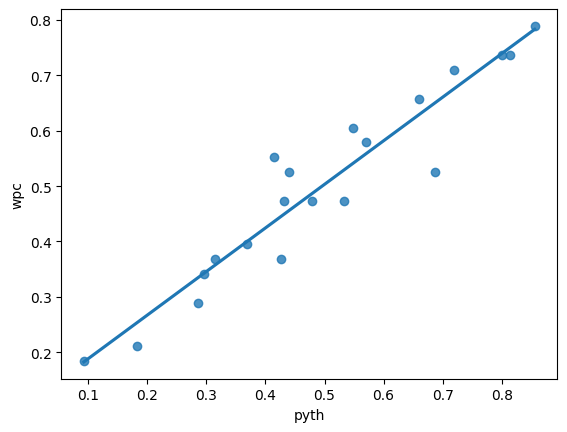

In [57]:
sns.regplot(x="pyth", y = "wpc", data = PrimeiroTurno,ci=None)

<Axes: xlabel='pyth', ylabel='wpc'>

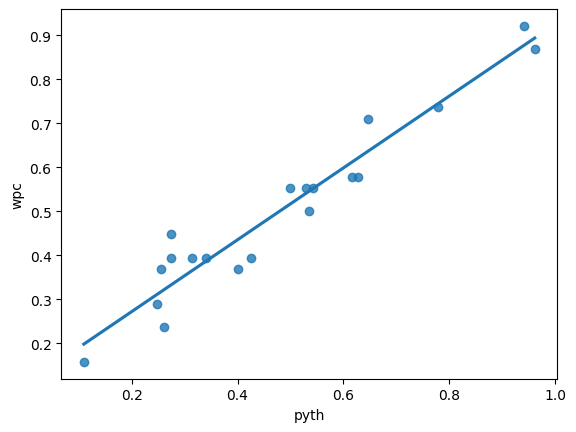

In [58]:
sns.regplot(x="pyth", y = "wpc", data = SegundoTurno,ci=None)

In [59]:
Bra = pd.merge(PrimeiroTurno, SegundoTurno, on=['time'])
Bra

,time,count_x_x,VCasaValor_x,GolsCasaC_x,GolsVisiC_x,count_y_x,VVisValor_x,GolsCasaV_x,GolsVisiV_x,W_x,G_x,GF_x,GA_x,wpc_x,pyth_x,count_x_y,VCasaValor_y,GolsCasaC_y,GolsVisiC_y,count_y_y,VVisValor_y,GolsCasaV_y,GolsVisiV_y,W_y,G_y,GF_y,GA_y,wpc_y,pyth_y
0,Arsenal,10,8.0,22,10,9,6.0,8,14,14.0,19,36,18,0.736842,0.800000,9,8.0,26,6,10,8.5,5,29,16.5,19,55,11,0.868421,0.961538
1,Aston Villa,9,8.5,26,6,10,5.0,19,14,13.5,19,40,25,0.710526,0.719101,10,5.5,22,22,9,5.0,14,14,10.5,19,36,36,0.552632,0.500000
2,Bournemouth,10,5.5,15,15,9,4.5,20,16,10.0,19,31,35,0.526316,0.439616,9,4.5,12,13,10,3.0,19,11,7.5,19,23,32,0.394737,0.340631
3,Brentford,10,4.5,17,18,9,2.5,11,8,7.0,19,25,29,0.368421,0.426330,9,4.0,12,16,10,3.5,20,19,7.5,19,31,36,0.394737,0.425786
4,Brighton,10,7.0,22,14,9,4.0,19,16,11.0,19,38,33,0.578947,0.570075,9,4.0,8,13,10,3.0,16,9,7.0,19,17,29,0.368421,0.255752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,Nott'ham Forest,9,3.5,12,14,10,3.0,20,10,6.5,19,22,34,0.342105,0.295122,10,4.0,15,16,9,3.0,17,12,7.0,19,27,33,0.368421,0.400990
16,Sheffield Utd,10,2.5,10,24,9,1.0,23,5,3.5,19,15,47,0.184211,0.092440,9,1.5,9,33,10,1.5,24,11,3.0,19,20,57,0.157895,0.109619
17,Tottenham,9,6.0,17,12,10,6.5,16,22,12.5,19,39,28,0.657895,0.659870,10,7.0,21,15,9,3.5,18,14,10.5,19,35,33,0.552632,0.529386
18,West Ham,9,6.0,17,10,10,5.5,20,16,11.5,19,33,30,0.605263,0.547511,10,5.0,14,18,9,2.5,26,13,7.5,19,27,44,0.394737,0.273546


<Axes: xlabel='wpc_x', ylabel='wpc_y'>

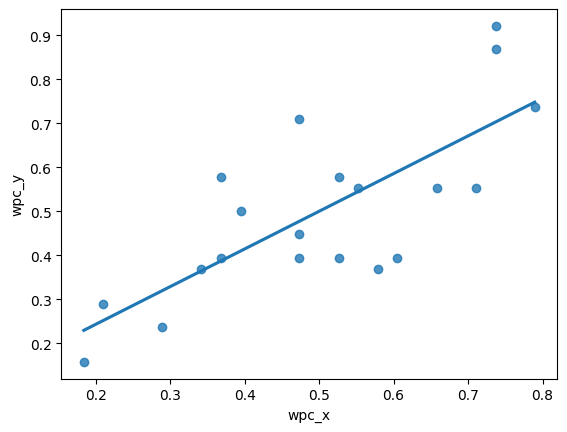

In [60]:
sns.regplot(x="wpc_x", y = "wpc_y", data = Bra,ci=None)

<Axes: xlabel='pyth_x', ylabel='wpc_y'>

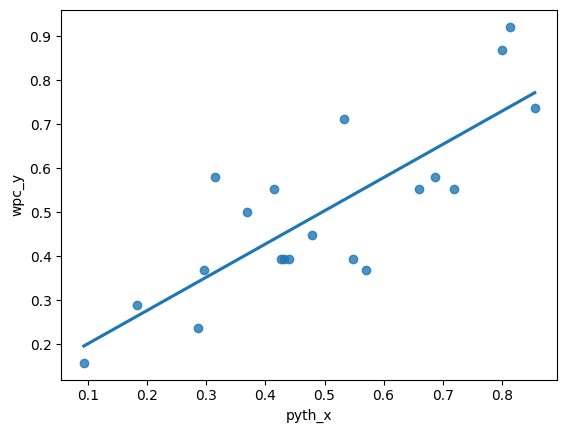

In [61]:
sns.regplot(x="pyth_x", y = "wpc_y", data = Bra, ci=None)

In [62]:
dd = Bra.loc[:,['pyth_x', 'wpc_x', 'pyth_y', 'wpc_y']]
dd

,pyth_x,wpc_x,pyth_y,wpc_y
0,0.800000,0.736842,0.961538,0.868421
1,0.719101,0.710526,0.500000,0.552632
2,0.439616,0.526316,0.340631,0.394737
3,0.426330,0.368421,0.425786,0.394737
4,0.570075,0.578947,0.255752,0.368421
...,...,...,...,...
15,0.295122,0.342105,0.400990,0.368421
16,0.092440,0.184211,0.109619,0.157895
17,0.659870,0.657895,0.529386,0.552632
18,0.547511,0.605263,0.273546,0.394737


In [63]:
cor_matrix = dd.corr()

# View the correlation matrix
cor_matrix

,pyth_x,wpc_x,pyth_y,wpc_y
pyth_x,1.000000,0.952233,0.732654,0.808502
wpc_x,0.952233,1.000000,0.661247,0.759328
pyth_y,0.732654,0.661247,1.000000,0.963960
wpc_y,0.808502,0.759328,0.963960,1.000000
